# Recognising Handwritten Digits on MNIST Dataset using KNN 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Step 1. Data Preparation

In [5]:
df = pd.read_csv('/Users/Dipesh/Desktop/CodingClub/Digit_Recognizer/train.csv')

print(df.shape)

(42000, 785)


In [6]:
# So we have 785 columns and 28x28 is 784 so for every pixel we have value for it and we have made it as a flatten array
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [7]:
df.head(n=5) # the pixels values are from 0 to 255

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [9]:
# Now we have to segregate x and y, from pixel 0 to 783 is x and label is y

# So here x is data from all the row after 1st column
X = data[:,1:]

# And y is data from all the rows but only the 0th column
Y = data[:,0]

print(X.shape,Y.shape)

(42000, 784) (42000,)


In [10]:
print(X) # contain all pixel values

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
print(Y) # contains all label values

[1 0 1 ... 7 6 9]


In [12]:
# As we know that there are 42000 examples so first we make a train test split
# we want test our algorithm better, so we will split our data in two parts one is for testing part and one is for training
# part, and criteria is that 80% of data will be in training part and rest 20% in testing part
split = int(0.8*X.shape[0])
print(split)

# In X we want all the rows till split and all the columns
X_train = X[:split,:]
Y_train = Y[:split] # all rows till split

X_test = X[split:,:] # All the rows after split and all the columns
Y_test = Y[split:]   # All the rows after split

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


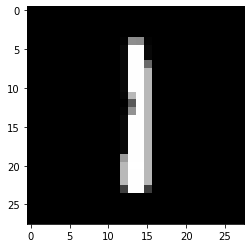

1


In [23]:
#Visualise SOme Samples
# This function will take sample image
def drawImg(sample):
    # First we have to reshape that image because the image we are having is the flattern array
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
drawImg(X_train[2])
print(Y_train[2])
    
    

### Step 2. K-NN

In [32]:
# Can we apply KNN to this data ?

In [19]:
# This is the KNN Algorithm which we have done previously
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
    
    
    

### Step 3 : Make Predictions 

In [20]:
# Prediction over test images

pred = knn(X_train,Y_train,X_test[38])

print(int(pred))

0


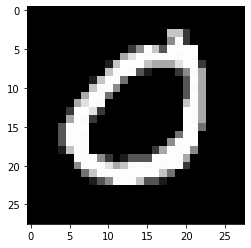

0


In [21]:

drawImg(X_test[38])
print(Y_test[38])